In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    
reset_plt(18, 22)

In [3]:
pickle_in = open('./data/OB2/OB2_3_peaks_assym_with_incl_20x1000_inclfree.pkl',"rb")
res2 = pickle.load(pickle_in)
p = res2.params

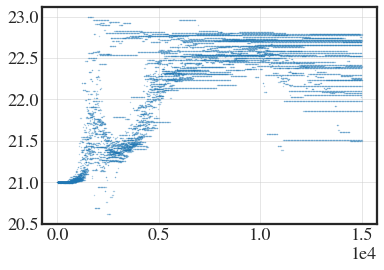

In [4]:
plt.scatter( np.arange(len(res2.flatchain['theta_inc'])) , res2.flatchain['theta_inc'], s=0.1, alpha=0.5)


Low =  0.5728476139888842
Med =  1.0458070336321081
High =  1.059902268688553


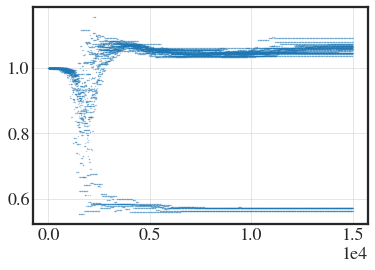

In [5]:
plt.scatter( np.arange(len(res2.flatchain['theta_inc'])) , res2.flatchain['ratio_vel'], s=0.1, alpha=0.5)
print('Low = ', np.percentile(res2.flatchain['ratio_vel'][5000:], 15.9))
print('Med = ', np.median(res2.flatchain['ratio_vel'][5000:]))
print('High = ', np.percentile(res2.flatchain['ratio_vel'][5000:], 100-15.9))


In [6]:
pickle_in = open('./data/OB2/OB2_fit_ratio_vel_110_perfect_42x500.pkl',"rb")
res2 = pickle.load(pickle_in)
p = res2.params

1.01037205163148 0.030752486775160046
17.698369735100634 4.252814691144732 65.99715785307937


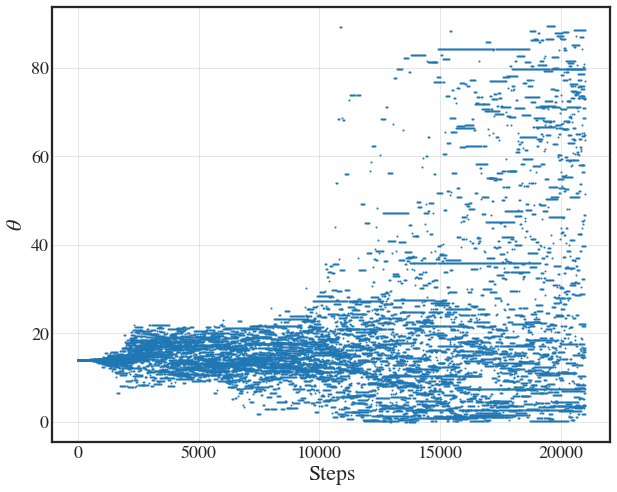

In [7]:
flat2 = res2.flatchain

plt.figure(figsize=(10,8))
plt.scatter( np.arange(len(flat2['theta_inc'])), flat2['theta_inc'], s=1, alpha=1 ) 
plt.ylabel(r'$\theta$'), plt.xlabel('Steps')
plt.ticklabel_format(axis='x', style='plain')

steady=15000
print(np.mean(flat2['ratio_vel']), np.std(flat2['ratio_vel']))
print(np.median(flat2['theta_inc'][steady:]), np.percentile(flat2['theta_inc'][steady:], 16),
      np.percentile(flat2['theta_inc'][steady:], 84))

(Text(0.5, 0, '$\\theta$'), Text(0, 0.5, '$\\delta$'))

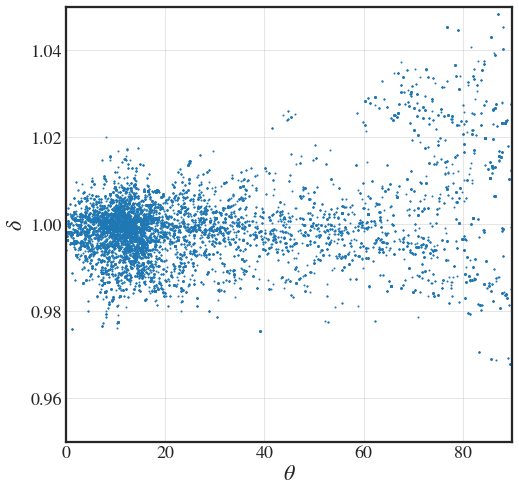

In [8]:
pickle_in = open('./data/OB2/OB2_fit_ratio_vel_094_perfect_42x500.pkl',"rb")
res1 = pickle.load(pickle_in)
flat1 = res1.flatchain


plt.figure(figsize=(8,8))
steady=5000
plt.scatter( flat1['theta_inc'][steady:], flat1['ratio_vel'][steady:], s=1, alpha=1 ) 

plt.ylim(0.95, 1.05), 
plt.xlim(0, 90)
plt.xlabel(r'$\theta$'), plt.ylabel(r'$\delta$')

0.9996380046718651 0.9864821384421519 1.0055738702811414


(0.88, 1.12)

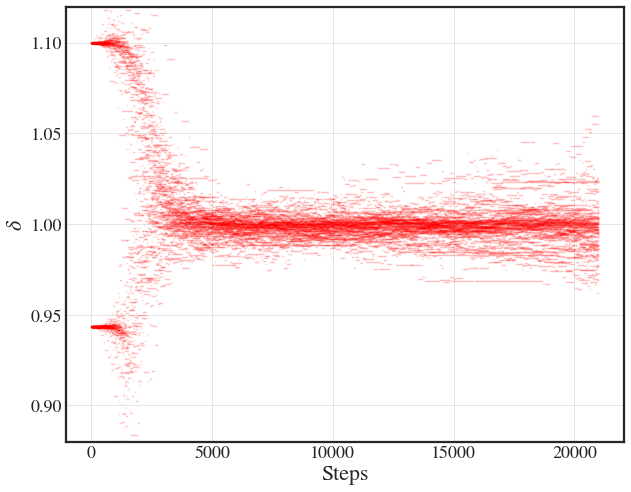

In [9]:
plt.figure(figsize=(10,8))
plt.scatter( np.arange(len(flat2['theta_inc'])), flat2['ratio_vel'], s=1, alpha=0.1, color='red' ) 
plt.scatter( np.arange(len(flat1['theta_inc'])), flat1['ratio_vel'], s=1, alpha=0.1, color='red' ) 
plt.ylabel(r'$\delta$'), plt.xlabel('Steps')
plt.ticklabel_format(axis='x', style='plain')

steady=15000
#print(np.mean(flat2['ratio_vel']), np.std(flat2['ratio_vel']))
print(np.median(flat2['ratio_vel'][steady:]), np.percentile(flat2['ratio_vel'][steady:], 16),
      np.percentile(flat2['ratio_vel'][steady:], 84))
plt.ylim(0.88, 1.12)

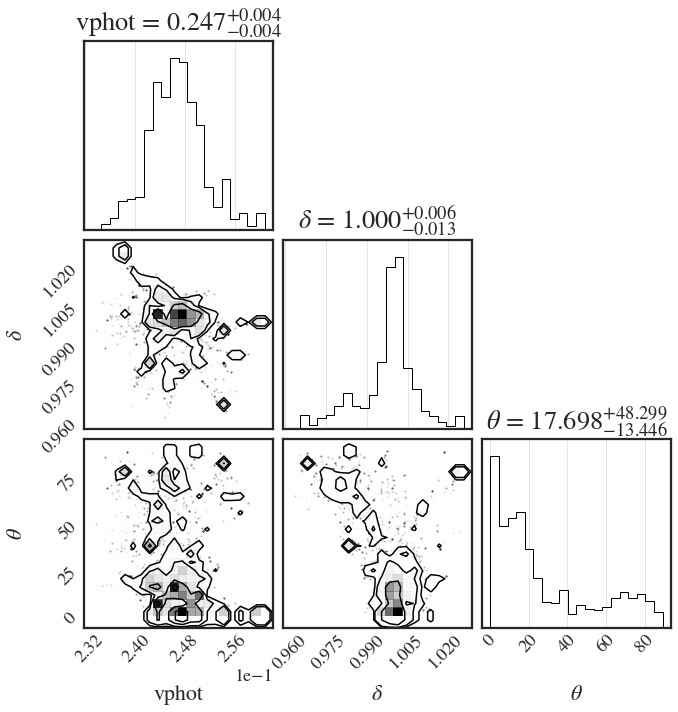

In [11]:
import corner 

fig,ax = plt.subplots(figsize=(10,10),nrows=3,ncols=3)

corner.corner( np.array([flat2['vphot'][steady:], flat2['ratio_vel'][steady:], flat2['theta_inc'][steady:]]).T, 
            labels=['vphot', r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

In [12]:
pickle_in = open('./data/OB2/OB2_fit_ratio_vel_100_28x1000.pkl',"rb")
res1 = pickle.load(pickle_in)
flat3 = res1.flatchain


(Text(0.5, 0, '$\\theta$'), Text(0, 0.5, '$\\delta$'))

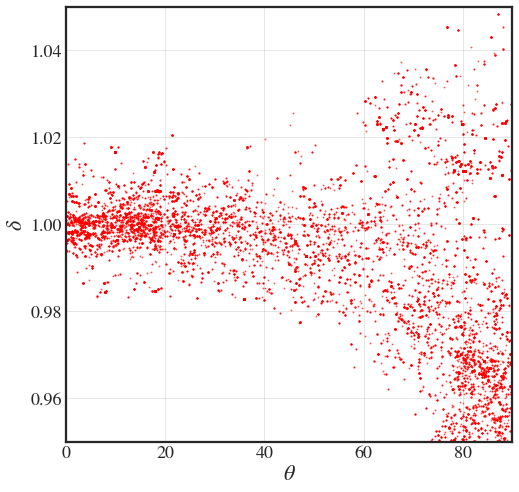

In [17]:
plt.figure(figsize=(8,8))
plt.scatter( flat2['theta_inc'][steady:], flat2['ratio_vel'][steady:], s=1, alpha=0.5, color='red' ) 
plt.scatter( flat1['theta_inc'][steady:], flat1['ratio_vel'][steady:], s=1, alpha=0.5, color='red' ) 
plt.scatter( flat3['theta_inc'][steady:], flat3['ratio_vel'][steady:], s=1, alpha=0.5, color='red' ) 


plt.ylim(0.95, 1.05), plt.xlim(0, 90)
plt.xlabel(r'$\theta$'), plt.ylabel(r'$\delta$')

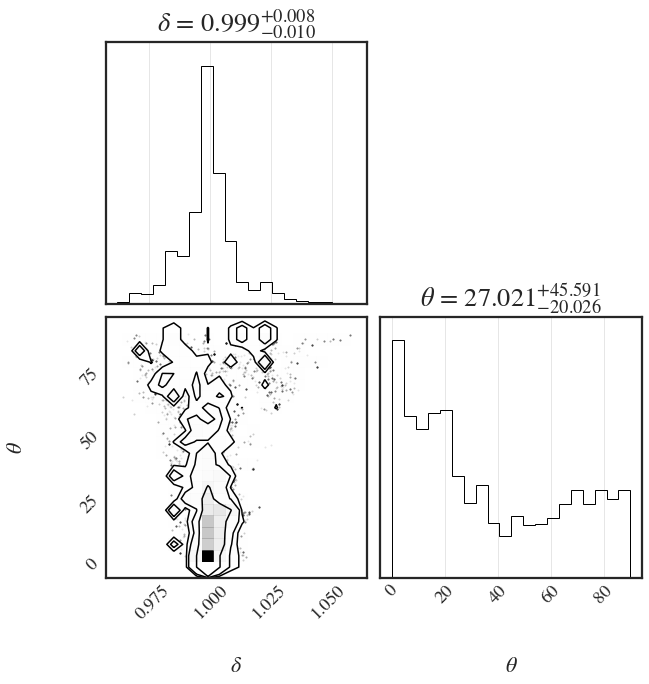

In [13]:
theta_inc = np.append(flat1['theta_inc'][steady:], flat2['theta_inc'][steady:])#, flat3['theta_inc'])
ratio_vel = np.append(flat1['ratio_vel'][steady:], flat2['ratio_vel'][steady:])#, flat3['ratio_vel'])

#theta_inc = np.append(theta_inc, flat3['theta_inc'])
#ratio_vel = np.append(ratio_vel, flat3['ratio_vel'])

import corner 

fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

corner.corner( np.array([ratio_vel, theta_inc]).T, 
            labels=[r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

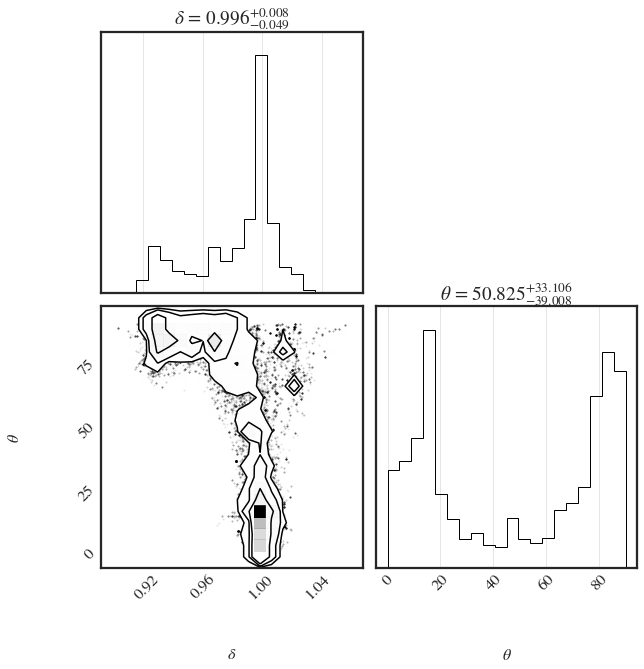

In [113]:
theta_inc = np.append(flat1['theta_inc'][steady:], flat2['theta_inc'][steady:])#, flat3['theta_inc'])
ratio_vel = np.append(flat1['ratio_vel'][steady:], flat2['ratio_vel'][steady:])#, flat3['ratio_vel'])

theta_inc = np.append(theta_inc, flat3['theta_inc'])
ratio_vel = np.append(ratio_vel, flat3['ratio_vel'])

#theta_inc = flat3['theta_inc']
#ratio_vel = flat3['ratio_vel']

import corner 

fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

corner.corner( np.array([ratio_vel, theta_inc]).T, 
            labels=[r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

In [116]:
ratio_vel_4 = ratio_vel[(theta_inc<28) & (theta_inc>14)]

print(np.percentile(ratio_vel_4, 15.9), np.median(ratio_vel_4), np.percentile(ratio_vel_4, 100-15.9))

0.9958875447172111 0.9994721265057086 1.0054505326149652


### Epoch 1

(1.0080819078880725, 1.0672151010407185, 1.0844436497880974)

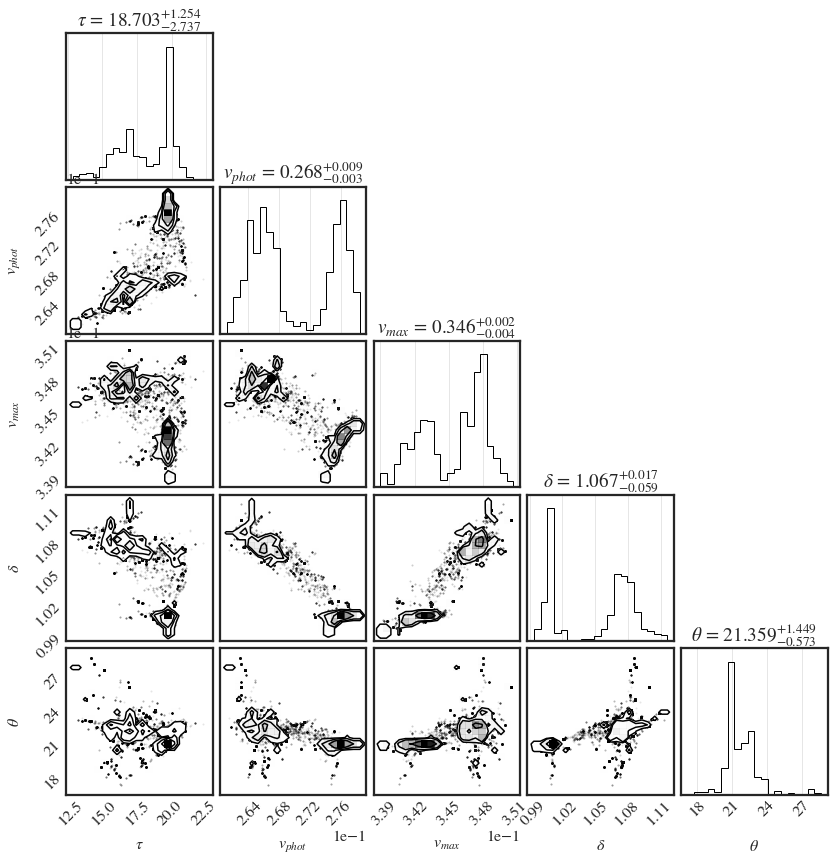

In [69]:
pickle_in = open('./data/OB1/OB1_fit_ratio_vel_100_perfect_42x1000.pkl',"rb")
res1 = pickle.load(pickle_in)
flat = res1.flatchain

reset_plt(16,16)

fig,ax = plt.subplots(figsize=(12,12),nrows=5,ncols=5)
corner.corner( np.array([flat['tau'], flat['vphot'], flat['vmax'], flat['ratio_vel'], flat['theta_inc']]).T, 
            labels=[r'$\tau$', r'$v_{phot}$', r'$v_{max}$', r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 
np.percentile(flat['ratio_vel'], 15.9), np.median(flat['ratio_vel']), np.percentile(flat['ratio_vel'], 100-15.9)

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

(0.9693068797593124, 0.9858088561047613, 0.9957899247801729)

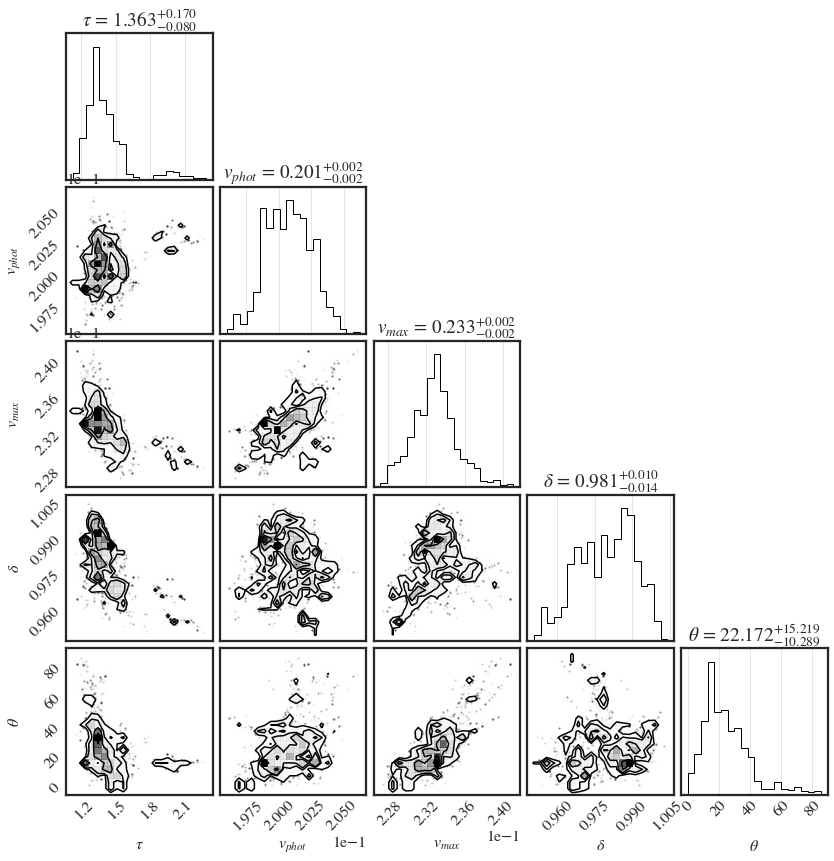

In [119]:
pickle_in = open('./data/OB3/OB3_fit_ratio_vel_100_perfect_28x500.pkl',"rb")
res1 = pickle.load(pickle_in)
flat = res1.flatchain

reset_plt(16,16)

steady = 10000

fig,ax = plt.subplots(figsize=(12,12),nrows=5,ncols=5)
corner.corner( np.array([flat['tau'][steady:], flat['vphot'][steady:], flat['vmax'][steady:], flat['ratio_vel'][steady:],
                         flat['theta_inc'][steady:]]).T, 
            labels=[r'$\tau$', r'$v_{phot}$', r'$v_{max}$', r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 
np.percentile(flat['ratio_vel'], 15.9), np.median(flat['ratio_vel']), np.percentile(flat['ratio_vel'], 100-15.9)

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

(0.901739726588607, 0.9198645224147087, 0.9480013513946569)

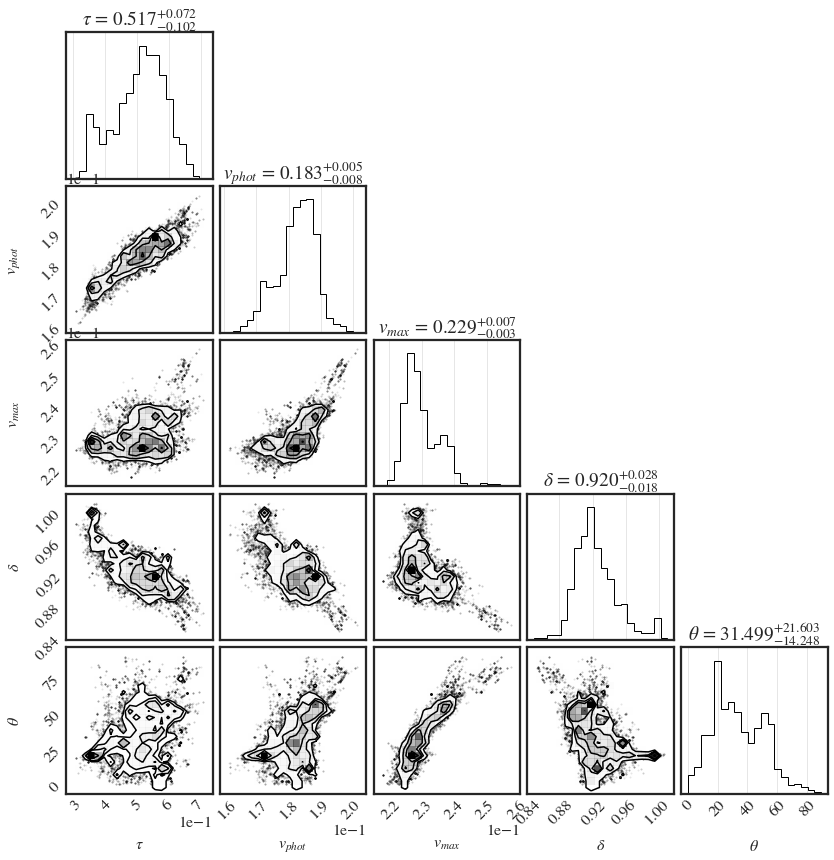

In [109]:
pickle_in = open('./data/OB4/OB4_fit_ratio_vel_100_perfect_28x1000.pkl',"rb")
res1 = pickle.load(pickle_in)
flat = res1.flatchain

reset_plt(16,16)

fig,ax = plt.subplots(figsize=(12,12),nrows=5,ncols=5)
corner.corner( np.array([flat['tau'], flat['vphot'], flat['vmax'], flat['ratio_vel'], flat['theta_inc']]).T, 
            labels=[r'$\tau$', r'$v_{phot}$', r'$v_{max}$', r'$\delta$', r'$\theta$'], show_titles=True, 
            fig=fig, title_fmt = '.3f'); 
#plt.tight_layout() 
np.percentile(flat['ratio_vel'], 15.9), np.median(flat['ratio_vel']), np.percentile(flat['ratio_vel'], 100-15.9)

#plt.savefig('Pictures/Simulated_angle_cov.png', dpi=300)

In [111]:
ratio_vel_4 = flat['ratio_vel'][(flat['theta_inc']<28) & (flat['theta_inc']>14)]

print(np.percentile(ratio_vel_4, 15.9), np.median(ratio_vel_4), np.percentile(ratio_vel_4, 100-15.9))

0.9151034744109471 0.9372990979551242 0.9786063145792139
